# Grundlagen der Künstlichen Intelligenz - Wintersemester 2024/25


# Übung 2: Regression und Klassifikation mit linearen Modellen

---

> 'Grundlagen der künstlichen Intelligenz' im Wintersemester 2024/2025
>
> - T.T.-Prof. Benjamin Schäfer, benjamin.schaefer@kit.edu
> - Prof. Gerhard Neumann, gerhard.neumann@kit.edu

---

In dieser Übung beschäftigen wir uns mit die grundlegenden Konzepte der Regression und Klassifikation anhand von linearen Modellen. In der ersten Aufgabe werden wir lineare Modelle für eine Regressionsaufgabe auf synthetischen Daten anwenden. Wir schauen uns an, welchen Einfluss die Kapazität von Modellen auf die Generalisierungsfähigkeit hat und wie Regularisierung helfen kann, Overfitting zu vermeiden. In der zweiten Aufgabe wenden wir ein lineares Modell zur Klassifikation an. Wir werden den bekannten Titanic-Datensatz verwenden, um mithilfe einer logistischen Regression zu bestimmen, welche Faktoren das Überleben der Passagiere beeinflusst haben.

### Übungsteam

- Sebastian Pütz, sebastian.puetz@kit.edu
- Ulrich Oberhofer, ulrich.oberhofer@kit.edu
- Philipp Dahlinger, philipp.dahlinger@kit.edu
- Nicolas Schreiber, nicolas.schreiber@kit.edu


# Gruppenabgabe

Die Übungsblätter können in Gruppen von bis zu **3 Studierenden** abgegeben werden. **Jede Person aus der Gruppe muss die finale Version der Abgabe über Ilias hochladen**, es genügt nicht, dass nur eine Person aus der Gruppe dies tut. Es ist prinzipiell möglich, im Laufe des Semesters sich einer neuen Gruppe anzuschließen, sollte sich die eigene Gruppe vorzeitig auflösen. Generell muss jede Gruppe ihre eigene Lösung hochladen, wir werden die Abgaben auf Duplikate überprüfen.

Die Gruppen werden automatisch erfasst, **gebt deshalb die u-Kürzel eurer Gruppenmitglieder in die folgende Zelle ein.** Falls eure Gruppe nur aus 2 Studierenden besteht, oder ihr alleine abgibt, lasst die verbleibenden Felder frei. Hier ein Beispiel für eine Gruppe bestehend aus uabcd und uefgh:

_U-Kürzel der Gruppenmitglieder:_

_Mitglied 1: uabcd_

_Mitglied 2: uefgh_

_Mitglied 3:_


U-Kürzel der Gruppenmitglieder:

Mitglied 1: uzrzy

Mitglied 2: uqjwv

Mitglied 3:


# Auto-grading

Wir nutzen ein auto-grading System, welches eure abgegebenen Jupyter Notebooks automatisch analysiert und über
hidden tests auf Richtigkeit prüft. Über diese Tests werden die Punkte bestimmt, die ihr für das Übungsblatt erhaltet.

Damit das auto-grading reibungslos funktioniert bitte folgende Dinge beachten:

- Notebook muss Dateinamen "ex_02_regression_classification.ipynb" haben
- PDF und Jupyter notebook einzeln im Ilias hochladen (nicht als Zip!)
- Vor dem Abgeben eines Notebooks bitte testen, dass alles von vorne bis hinten ohne Fehler durchläuft.
- Zellen, welche mit "##### DO NOT CHANGE #####" markiert sind dürfen weder gelöscht noch bearbeitet werden
- Eure Lösung muss in die richtige Zelle (markiert mit "# YOUR CODE HERE") eingetragen werden.
  - (dabei natürlich den NotImplementedError löschen!)
- Es gibt potentiell scheinbar leere Zellen, die auch mit "" markiert sind. Auch diese dürfen nicht bearbeitet oder gelöscht werden.
  - Falls dies doch gemacht wird, dann wird das automatische Grading nicht funktionieren und ihr erhaltet keine Punkte.
  - Wir werden hier strikt handeln und keine Ausnahmen machen, falls jemand doch Zellen verändert, die eindeutig als readonly markiert sind!
- Die Jupyter Notebooks haben inline Tests (für euch sichtbar), welche euer Ergebnis auf grobe Richtigkeit überprüfen.
  - Diese sind primär für euch, um Fehler zu erkennen und zu korrigieren.
  - Die inline Tests, die ihr im Notebook sehen könnt, sind allerdings nicht die Tests welche für das Grading verwendet werden!
  - Die inline Tests sind eine notwendige Bedingung, um beim Grading der Aufgabe Punkte zu erhalten!


In [2]:
##### DO NOT CHANGE #####
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge

import matplotlib.pyplot as plt

sns.set(style="whitegrid")

##### DO NOT CHANGE #####

# Aufgabe 2.1 - Regression (6 = 2+2+2 Punkte)

In dieser Aufgabe befassen wir uns mit der linearen Regression. Zunächst generieren wir synthetische Datenpunkte in Form eines Polynoms mit hinzugefügtem Rauschen (Noise). Ziel ist es, diese Daten zunächst mit linearer Regression und dann mit verallgemeinerter linearer Regression, konkret mit Polynomregression, zu fitten. Im späteren Verlauf wenden wir dann eine Regularisierungsmethode an, um ein Überanpassen (Overfitting) des Modells zu vermeiden.


### Datenerzeugung


In [3]:
##### DO NOT CHANGE #####
np.random.seed(42)

# Generate input data
x = np.linspace(-3, 3, 30)
y = 0.4 * x ** 3 - 0.2 * x + 5 + np.random.normal(0, 1, x.shape[0])

##### DO NOT CHANGE #####

### Datensatzaufteilung


Wir teilen den Datensatz jetzt in eine Traning- und eine Testmenge auf. Die Trainingsdaten dienen dazu, das lineare Regressionsmodell zu trainieren und die Modellparameter zu optimieren. Die Testdaten werden im Anschluss dafür verwendet, um die Modellleistung auf neuen Datenpunkten zu evaluieren, die aus der gleichen zugrunde liegenden Verteilung stammen. Diese Annahme ist wichtig, da sie sicherstellt, dass die im Training erlernten Muster auch im Testset anwendbar sind und das Modell somit realistisch evaluiert werden kann. In realen Anwendungen ist diese Annahme jedoch oft nicht vollständig erfüllt.

> **Hinweis:** In dieser Übung verwenden wir eine 50:50-Aufteilung, um den Effekt auf das Modell besser zu veranschaulichen. In realen Szenarien werden jedoch üblicherweise kleinere Anteile (zum Beispiel 20-30%) für die Testmenge genutzt, um mehr Daten für das Training zu haben.


In [4]:
##### DO NOT CHANGE #####
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    x.reshape(-1, 1), y, test_size=0.5, random_state=42
)

##### DO NOT CHANGE #####

Wir sehen uns die erzeugten Traning- und Testdatenpunkte in der folgenden Grafik an.


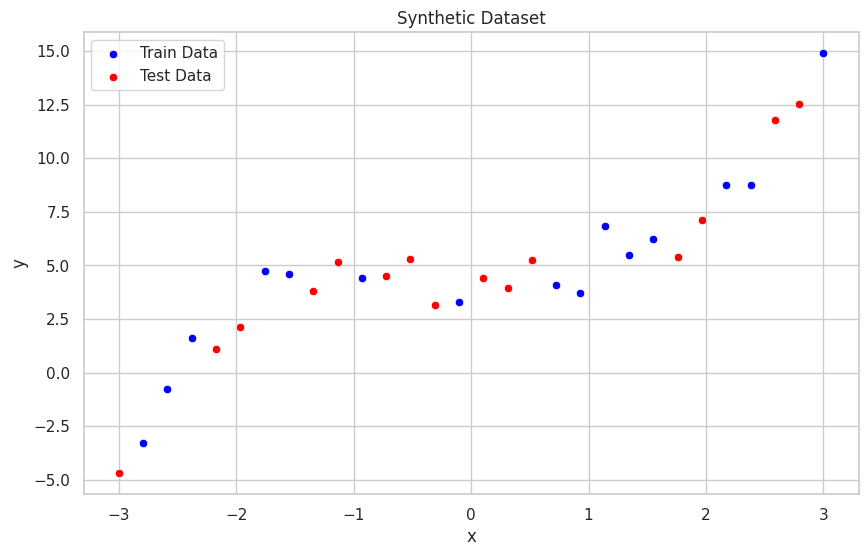

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label="Train Data", color="blue")
sns.scatterplot(x=X_test.flatten(), y=y_test, label="Test Data", color="red")
plt.title("Synthetic Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Lineare Regression (2 Punkte)


In diesem Schritt beginnen wir mit einer einfachen linearen Regression, um die Daten zu modellieren. Dafür verwenden wir das [`LinearRegression`-Modul](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) aus der Bibliothek `scikit-learn`. Fittet im nächsten Schritt zunächst das Regressionsmodell mit den Trainingsdaten. Alle wichtigen Informationen dazu findet ihr in der Dokumentation.


In [6]:
##### DO NOT CHANGE #####
linear_model = LinearRegression()

##### DO NOT CHANGE #####

In [7]:
# fit the model
# YOUR CODE HERE
linear_model.fit(X_train, y_train)

LinearRegression()

Nach dem Training visualisieren wir das Ergebnis der Modellierung. Dabei zeigen wir die gerade Linie, die das Modell als beste lineare Lösung für die gegebenen Daten ermittelt hat. Wir plotten sowohl die Trainings- als auch die Testdatenpunkte, um zu sehen, wie gut das Modell zu beiden Datensätzen passt. Da die zugrunde liegende Struktur der Daten jedoch nicht rein linear ist, wird die Anpassung der Linie an die Punkte nur ungefähr, aber nicht optimal sein.


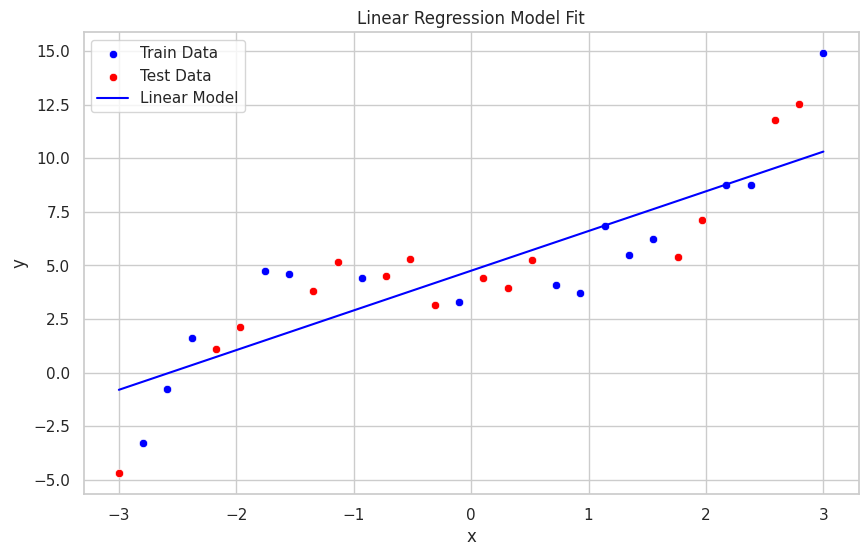

In [8]:
x_plot_range = np.linspace(-3, 3, 100)
y_plot_pred = linear_model.predict(x_plot_range.reshape(-1, 1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train.flatten(), y=y_train, label="Train Data", color="blue")
sns.scatterplot(x=X_test.flatten(), y=y_test, label="Test Data", color="red")
sns.lineplot(x=x_plot_range, y=y_plot_pred, label="Linear Model", color="blue")
plt.title("Linear Regression Model Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Wir wollen die lineare Anpassung nicht nur anschaulich bewerten, sondern auch quantitativ. Dazu nutzen wir die mittlere quadratische Abweichung (Mean squared error, MSE): $\text{MSE}=\frac{1}{n}\sum_{i=1}^n(y_{i, \text{pred}}-y_{i, \text{true}})^2$ *(siehe Vorlesung 2, Folie 10 und Vorlesung 3, Folie 25)*.
Definiert zunächst eine Funktion, welche die mittlere quadratische Abweichung zwischen vom Modell berechneten Punkten und den echten Daten berechnet:


In [9]:
def mse(y_prediction, y_true):
    # YOUR CODE HERE
    return ((y_prediction - y_true) ** 2).mean()

Wir berechnen nun den MSE sowohl für die Trainings als auch für die Testdaten.


In [10]:
##### DO NOT CHANGE #####
mse_linear_train = mse(linear_model.predict(X_train), y_train)
mse_linear_test = mse(linear_model.predict(X_test), y_test)
print(
    f"MSE Trainingsdaten : {mse_linear_train:.4f}, MSE Testdaten : {mse_linear_test:.4f}"
)

##### DO NOT CHANGE #####

MSE Trainingsdaten : 4.6455, MSE Testdaten : 3.5057


### Polynomregression (2 Punkte)


> **Hinweis:** Obwohl Polynomregression nichtlineare Beziehungen zwischen den Daten darstellen kann, gilt sie dennoch als lineares Modell. Das liegt daran, dass die Polynomregression die Eingangsvariablen lediglich durch Potenzen erweitert (zum Beispiel $x^2$, $x^3$ etc.), aber die Parameter des Modells (die Koeffizienten dieser Potenzen) immer noch linear geschätzt werden. Es bleibt also ein lineares Modell in den Parametern, obwohl die Eingangsvariablen eine nicht-lineare Form annehmen.


Wir haben festgestellt, dass eine einfache lineare Regression nicht optimal für die Anpassung unserer Daten geeignet ist. Daher greifen wir auf die verallgemeinerte lineare Regression zurück, und verwenden speziell die Polynomregression. Anstatt eine einfache lineare Beziehung $y = w_0 + w_1 x + \epsilon$ zu modellieren, ermöglicht die Polynomregression die Darstellung einer komplexeren Beziehung der Form:

$y = w_0 + w_1 x + w_2 x^2 + \dots + w_k x^k + \epsilon$,

wobei $k$ den Grad des Polynoms angibt.
In `scikit-learn` können wir mithilfe der Klasse `Pipeline` ein Modell für die Polynomregression erstellen.


Erstellt eine Funktion, die eine Polynomregression abhängig vom Polynomgrad erzeugt:


Schreibe eine Funktion `create_polynomial_regressor(poly_degree: int)`, die einen Polynomialregressor der gegebenen Ordnung `poly_degree` erstellt. Verwende dazu `PolynomialFeatures` aus `sklearn.preprocessing` um die Polynome der Ordnung `poly_degree` zu erzeugen (spezifiziert ausschließlich diesen Parameter). Verwende dann `LinearRegression` mit den default Parametern (analog zu dem vorherigen Modell) um das Modell zu erstellen.

> **Hinweis:** `scikit-learn` beinhaltet eine [`Pipeline`](https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html)-Klasse, die eine Abfolge von Operationen wie z. B. `PolynomialFeatures` und `LinearRegression` kombiniert.


In [11]:
def create_polynomial_regressor(poly_degree: int):
    # YOUR CODE HERE
    poly_feat = PolynomialFeatures(degree=poly_degree)
    line_reg = LinearRegression()
    polynomial_model = Pipeline([('polyFeat', poly_feat), ('linReg',line_reg)])

    return polynomial_model

Wir können dieses Modell jetzt benutzen, um die Trainingsdaten mit Polynomen eines festgelegten Grades anzupassen.


Fittet das Modell für jeden Wert $k$ in der unten gegebenen Menge `degrees`, und berechnet, welche Werte die Modelle je für den Input `X_train` bzw. `X_test` vorhersagen. Anschließend können wir uns ansehen, wie die Polynome unterschiedlichen Grades die Trainings- und Testdaten anpassen:


In [12]:
##### DO NOT CHANGE #####
# Define degrees
degrees = range(1, 13)

##### DO NOT CHANGE #####

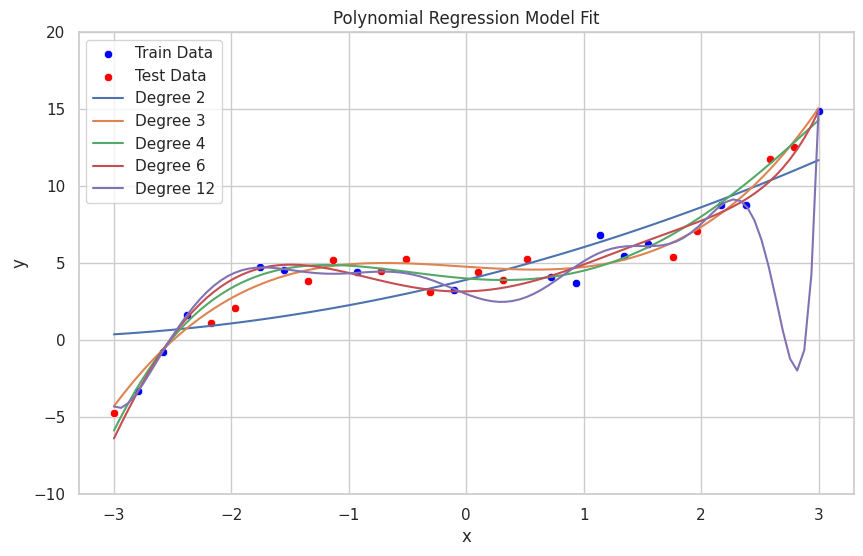

In [13]:
# Define which polynomials to plot and error dictionaries

plot_degrees = [2, 3, 4, 6, 12]  # Specify degrees to plot
polynomial_train_errors = {}
polynomial_test_errors = {}

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot train and test data
sns.scatterplot(x=X_train.flatten(), y=y_train, label="Train Data", color="blue")
sns.scatterplot(x=X_test.flatten(), y=y_test, label="Test Data", color="red")

# Fit models for each degree and calculate errors
for k in degrees:
    polynomial_model = create_polynomial_regressor(k)

    # use these names:
    y_train_pred = None
    y_test_pred = None

    # Fitting and Predictions
    # YOUR CODE HERE
    polynomial_model.fit(X_train, y_train)

    y_train_pred = polynomial_model.predict(X_train)
    y_test_pred = polynomial_model.predict(X_test)

    y_plot_pred = polynomial_model.predict(x_plot_range.reshape(-1, 1))

    # Plot polynomial model lines for specified degrees
    if k in plot_degrees:
        sns.lineplot(x=x_plot_range, y=y_plot_pred, label=f"Degree {k}")

    # Calculate MSE and store in dictionaries
    polynomial_train_errors[k] = mse(y_train, y_train_pred)
    polynomial_test_errors[k] = mse(y_test, y_test_pred)

# Finalize plot
plt.title("Polynomial Regression Model Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-10, 20)
plt.legend()
plt.show()

Nun können wir uns ansehen, wie sich der Mean Squared Error (MSE) abhängig der Kapazität des Modells verhält:


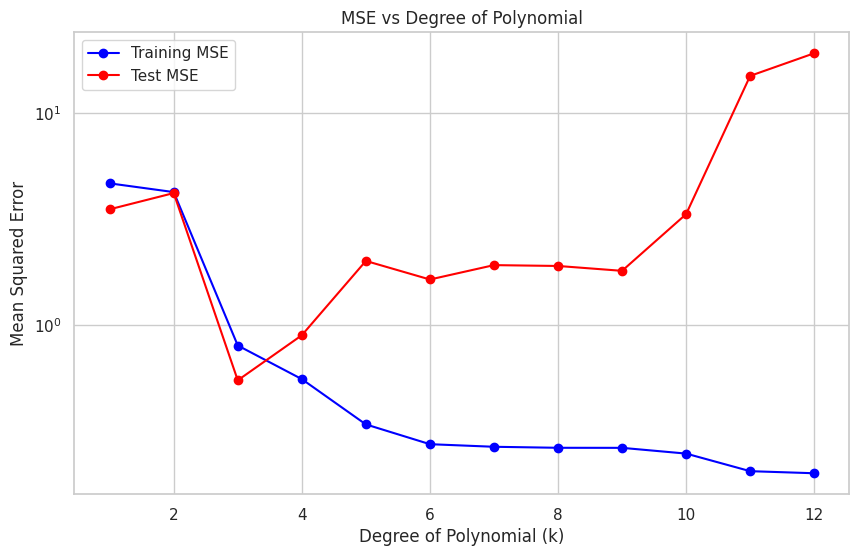

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(
    polynomial_train_errors.keys(),
    polynomial_train_errors.values(),
    label="Training MSE",
    marker="o",
    color="blue",
)
plt.plot(
    polynomial_test_errors.keys(),
    polynomial_test_errors.values(),
    label="Test MSE",
    marker="o",
    color="red"
)
plt.xlabel("Degree of Polynomial (k)")
plt.ylabel("Mean Squared Error")
plt.yscale("log")
plt.title("MSE vs Degree of Polynomial")
plt.legend()
plt.show()

Zu Beginn sinkt der Mean Squared Error (MSE) sowohl für die Trainings- als auch für die Testdaten mit zunehmendem Polynomgrad, was auf eine bessere Anpassung des Modells hindeutet. Während der MSE der Trainingsdaten mit weiter steigender Komplexität des Modells kontinuierlich abnimmt, zeigt sich ab einem Polynomgrad von 3 beim MSE der Testdaten jedoch ein Anstieg. Dies deutet auf Überanpassung _(overfitting)_ hin (siehe Vorlesung 2, Folie 33/Vorlesung 3, Folie 28 ff.): Das Modell passt sich zu stark an die Trainingsdaten an und verliert dadurch seine Fähigkeit, die Testdaten zuverlässig zu generalisieren.


### Regularisierung (2 Punkte)


Nach der Einführung in die Methode der linearen Regression und deren Erweiterung zur Polynomregression betrachten wir nun eine Regularisierungsmethode, die Ridge-Regression. Diese dient dazu, Überanpassungen bei komplexen Modellen zu verhindern (siehe Vorlesung 2, Folie 35 ff. und Vorlesung 3, Folie 31 ff.). Im Folgenden ersetzen wir die [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) konkret durch [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)-Regression, die einen Regularisierungsparameter $\alpha$ (in der Vorlesung $\lambda$) einführt. $\alpha$ bestimmt die Stärke der Regularisierung über den sogenannte Bestrafungsterm, der zu der Verlustfunktion _(loss function)_ hinzugefügt wird. Im Falle der Ridge-Regression ist dieser Term eine $L^2$-Norm des Gewichtsvektors: $\alpha \sum_{j=1}^n w_j^2$ . Dieser Bestrafungsterm reduziert die Modellkomplexität, indem er die Gewichte $\mathbf{w}$ verkleinert, insbesondere bei hohen $\alpha$-Werten. Ziel ist es, große Gewichte zu vermeiden und so ein Modell zu erzeugen, das besser generalisiert und Überanpassung vermeidet.


Erstellt im Folgenden analog zur Polynomregression ohne Regularisierung, die wir im letzten Schrritt gesehen haben, ein Modell, das die Polynomregression mit der Ridge Regression vereinigt. Ihr könnt hier ebenfalls die Klasse `Pipeline` aus `sklearn` nutzen um die beiden Modellklassen `PolynomialFeatures` und `Ridge` einzubinden. Spezifiziert für `PolynomialFeatures` ausschließlich den Grad der Polynome und für `Ridge` ausschließlich den Regularisierungsparamter $\alpha$:


In [15]:
def create_ridge_polynomial_regressor(poly_degree: int, alpha: float):
    # YOUR CODE HERE
    poly_feat = PolynomialFeatures(degree=poly_degree)
    rig_reg = Ridge(alpha)
    ridge_polynomial_model = Pipeline([('polyFeat', poly_feat), ('ridge', rig_reg)])

    return ridge_polynomial_model

Fittet das Modell für jeden Wert $\alpha$ in der unten gegebenen Menge `alphas`, und berechnet, welche Werte die Modelle je für den Input `X_train` bzw. `X_test` vorhersagen:


In [16]:
##### DO NOT CHANGE #####
# Range of alpha values to test
alphas = np.logspace(-3, 13, 100)
# Fix ploynomial degree
poly_degree = 12

##### DO NOT CHANGE #####

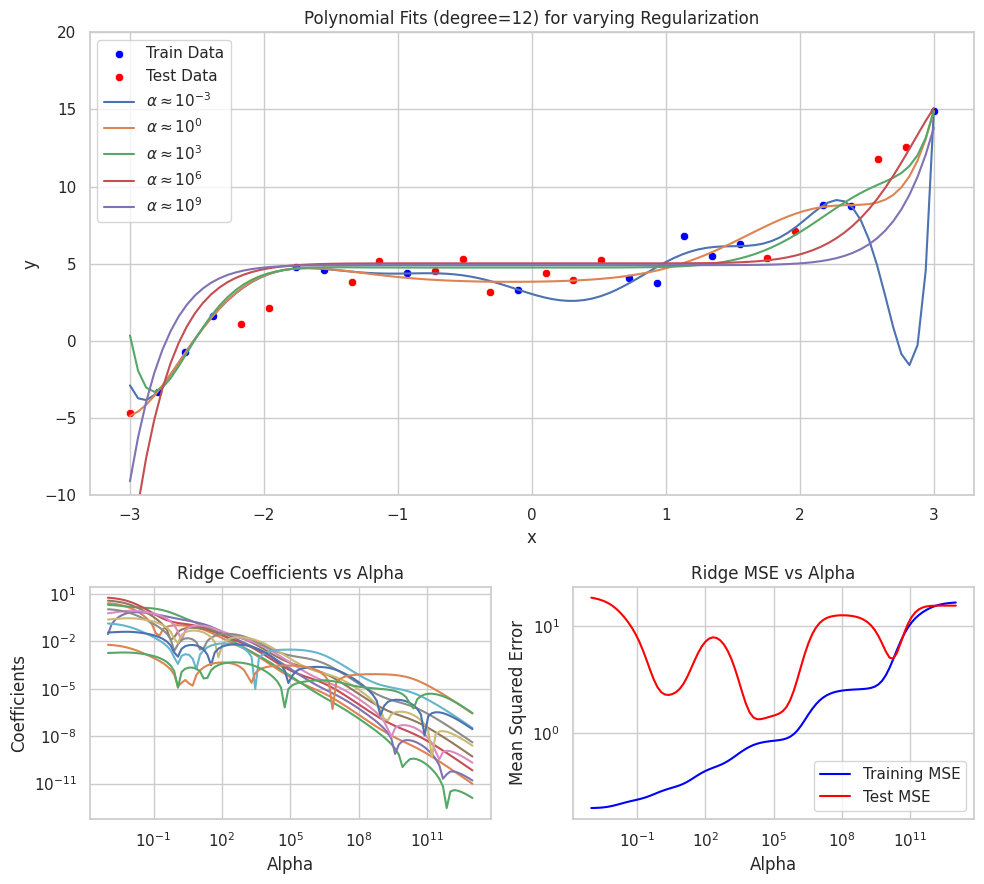

In [17]:
# Choose certain alphas to plot
alphas_plot = alphas[::20]  # Subset for plotting individual fits

# Lists to store coefficients and errors for each alpha
ridge_coefficients = []
ridge_train_errors = {}
ridge_test_errors = {}
ridge_fits = []

for alpha in alphas:
    # Ridge Regression
    ridge_polynomial_model = create_ridge_polynomial_regressor(poly_degree, alpha)

    # use these names:
    ridge_train_pred = None
    ridge_test_pred = None

    # Fitting and Predictions
    # YOUR CODE HERE
    ridge_polynomial_model.fit(X_train, y_train)

    ridge_train_pred = ridge_polynomial_model.predict(X_train)
    ridge_test_pred = ridge_polynomial_model.predict(X_test)

    # Save the MSEs and the coefficients of the model in lists
    ridge_train_errors[alpha] = mse(y_train, ridge_train_pred)
    ridge_test_errors[alpha] = mse(y_test, ridge_test_pred)
    ridge_coefficients.append(ridge_polynomial_model.named_steps["ridge"].coef_)

    if alpha in alphas_plot:
        ridge_fits.append(ridge_polynomial_model.predict(x_plot_range.reshape(-1, 1)))

# Set up subplots with custom heights
fig = plt.figure(figsize=(10, 9))
gs = fig.add_gridspec(2, 2, height_ratios=[2, 1])

ax_main = fig.add_subplot(gs[0, :])
sns.scatterplot(
    x=X_train.flatten(), y=y_train, label="Train Data", color="blue", ax=ax_main
)
sns.scatterplot(
    x=X_test.flatten(), y=y_test, label="Test Data", color="red", ax=ax_main
)

for i, alpha in enumerate(alphas_plot):
    ax_main.plot(
        x_plot_range, ridge_fits[i], label=r"$\alpha \approx 10^{{{}}}$".format(int(np.log10(alpha)))
    )

ax_main.set_xlabel("x")
ax_main.set_ylabel("y")
ax_main.set_ylim(-10, 20)
ax_main.legend()
ax_main.set_title(f"Polynomial Fits (degree={poly_degree}) for varying Regularization")


# Plot Ridge coefficients vs alpha
ax_coef = fig.add_subplot(gs[1, 0])
ax_coef.plot(alphas, np.abs(ridge_coefficients))
ax_coef.set_xscale("log")
ax_coef.set_yscale("log")
ax_coef.set_title("Ridge Coefficients vs Alpha")
ax_coef.set_xlabel("Alpha")
ax_coef.set_ylabel("Coefficients")

# Plot Ridge MSE vs alpha
ax_mse = fig.add_subplot(gs[1, 1])
ax_mse.plot(alphas, ridge_train_errors.values(), color="blue", label="Training MSE")
ax_mse.plot(alphas, ridge_test_errors.values(), color="red", label="Test MSE")
ax_mse.set_xscale("log")
ax_mse.set_yscale("log")
ax_mse.set_title("Ridge MSE vs Alpha")
ax_mse.set_xlabel("Alpha")
ax_mse.set_ylabel("Mean Squared Error")
ax_mse.legend()

plt.tight_layout()
plt.show()

Wir können hier gut sehen, wie sich der Regularisierungsterm auf den Absolutwert der Koeffizienten und auf den MSE von Trainings- und Testdaten auswirkt.


Jetzt folgen noch ein paar Tests für Aufgabe 2.1, bei denen ihr eure Ergebnisse grob überprüfen könnt:


In [18]:
##### DO NOT CHANGE #####
# ID: mse-function-and-linear-fitting-test - possible points: 2

assert (mse (np.array([[1,2,3]]),np.array([[1,2,3]])) == 0) or (mse (np.array([1,2,3]),np.array([1,2,3])) == 0), "The MSE of two identical arrays should be 0!"
assert 3 < mse_linear_train < 5, "The training MSE of the linear regression model should be in the range between 3 and 5!"
assert 3 < mse_linear_test < 5, "The test MSE of the linear regression model should be in the range between 3 and 5!"


##### DO NOT CHANGE #####

In [19]:
##### DO NOT CHANGE #####
# ID: polynomial-regression-test - possible points: 2

assert isinstance(polynomial_train_errors, dict), "polynomial_train_errors should be a dictionary"
assert isinstance(polynomial_test_errors, dict), "polynomial_train_errors should be a dictionary"
assert polynomial_train_errors, "The dictionary should not be empty!"
assert polynomial_test_errors, "The dictionary should not be empty!"


##### DO NOT CHANGE #####

In [20]:
##### DO NOT CHANGE #####
# ID: ridge-regression-test - possible points: 2

assert isinstance(ridge_train_errors, dict), "ridge_train_errors should be a dictionary"
assert isinstance(ridge_test_errors, dict), "ridge_train_errors should be a dictionary"
assert ridge_train_errors, "The dictionary should not be empty!"
assert ridge_test_errors, "The dictionary should not be empty!"


##### DO NOT CHANGE #####

# Task 2.2 Klassifikation (8 = 2 + 6 Punkte)


### Datenvorbereitung und Exploration (2 Punkte)


In der zweiten Teilaufgabe analysieren wir einen realen Datensatz und führen darauf eine Klassifikation mithilfe einer logistischen Regression durch. Wir verwenden hierzu den Titanic-Datensatz, der Informationen zu Passagieren wie Alter, Geschlecht, (Kabinen-)Klasse an Bord sowie die Angabe, ob die jeweilige Person das Unglück überlebt hat, enthält. Ziel ist es, eine logistische Regression durchzuführen, die anhand der Merkmale Alter, Geschlecht und Klasse die Überlebenswahrscheinlichkeit der Passagiere berechnet und diese in die Kategorien „Überlebt“ und „Nicht überlebt“ einordnet.
Wir laden den Datensatz aus `seaborn` als `pandas.DataFrame` herunter und sehen uns die ersten Zeilen des Datensatzes an:


In [21]:
##### DO NOT CHANGE #####
titanic = sns.load_dataset("titanic")
titanic.head()

##### DO NOT CHANGE #####

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Zuerst wählen wir aus dem vollständigen Datensatz die Features _Überlebt (survived)_, _Alter (age)_, _Geschlecht (sex)_ und _Klasse (pclass)_ aus:


In [22]:
##### DO NOT CHANGE #####
data = titanic.loc[:, ["survived", "age", "sex", "pclass"]]
data = data.astype({"pclass": "float"})
data.head()

##### DO NOT CHANGE #####

,survived,age,sex,pclass
0,0,22.0,male,3.0
1,1,38.0,female,1.0
2,1,26.0,female,3.0
3,1,35.0,female,1.0
4,0,35.0,male,3.0


Für die Vorbereitung der Daten zur Verwendung in einem Regressionsmodell wandeln wir die Kategorie _Geschlecht (sex)_ in eine Binärvariable um. Dabei soll der Wert `male` in `0` und `female` in `1` umgewandelt werden. Verwendet dazu die `map`-Funktion von `pandas` und wendet diese auf die Spalte `data.loc[:, 'sex']` an.


In [23]:
# YOUR CODE HERE

data['sex'] = data.loc[:, 'sex'].map({'male': 0, 'female': 1})
data.head()

,survived,age,sex,pclass
0,0,22.0,0,3.0
1,1,38.0,1,1.0
2,1,26.0,1,3.0
3,1,35.0,1,1.0
4,0,35.0,0,3.0


Um die beiden nicht-binären Merkmale `pclass` und `age` für das Modell zu skalieren, wenden wir die Funktion [`MinMaxScaler()`](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html) aus [`sklearn`](https://scikit-learn.org/1.5/index.html) an. Durch die Normalisierung wird sichergestellt, dass die Werte dieser Merkmale auf eine gemeinsame Skala gebracht werden, was die Stabilität und Genauigkeit des Modells verbessern kann. Zuerst normalisieren wir die Spalte `pclass`. Führt anschließend die gleiche Vorgehensweise für die Spalte `age` durch.


In [24]:
##### DO NOT CHANGE #####
data.loc[:, "pclass"] = MinMaxScaler().fit_transform(
    data.loc[:, "pclass"].values.reshape(-1, 1)
)

##### DO NOT CHANGE #####

In [25]:
# Normalize the column 'age'
# YOUR CODE HERE
data.loc[:, "age"] = MinMaxScaler().fit_transform(
    data.loc[:, "age"].values.reshape(-1, 1)
)

Im nächsten Schritt entfernen wir alle Zeilen mit fehlenden Einträgen aus dem Datensatz:


In [26]:
##### DO NOT CHANGE #####
data.dropna(inplace=True)

##### DO NOT CHANGE #####

Im nächsten Schritt betrachten wir die Korrelationsmatrix des Datensatzes, um die Beziehungen zwischen den verschiedenen Merkmalen besser zu verstehen.


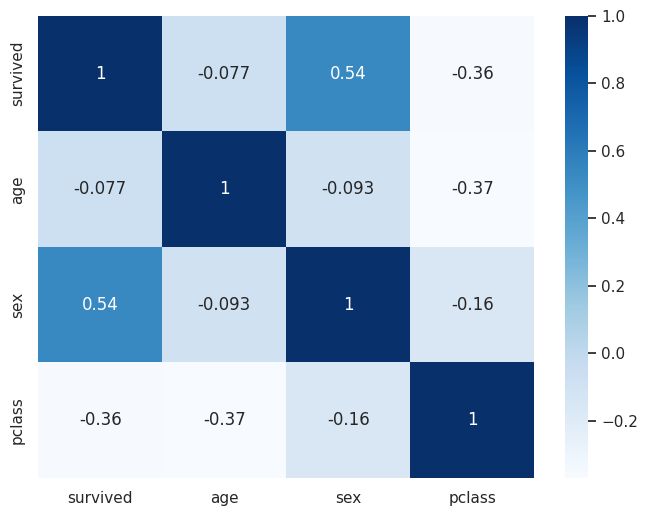

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), cmap="Blues", annot=True)
plt.show()

Anhand der Korrelationsmatrix erkennen wir die Zusammenhänge zwischen den einzelnen Merkmalen. Auffällig ist, dass die Passagierklasse und das Alter jeweils negativ mit der Überlebensrate korrelieren. Das bedeutet, dass Personen in einer niedrigeren Passagierklasse (Hinweis: Eine niedrigere Klassennummer entspricht einer höheren Klasse, ähnlich den Zugklassen) mit höherer Wahrscheinlichkeit überlebten. Beachte hier die Bedeutung der Werte im Datensatz:<br>
1 = “Person hat überlebt” <br>
0 = “Person hat nicht überlebt” <br>
Auch ein niedrigeres Alter steht in einer positiven Beziehung zur Überlebenswahrscheinlichkeit, wenngleich die Korrelation hier weniger stark ausgeprägt ist als bei der Passagierklasse.
Zudem zeigt sich eine positive Korrelation zwischen den Merkmalen Geschlecht und Überleben. Da wir Mann = 0 und Frau = 1 kodiert haben, lässt sich daraus ableiten, dass Frauen eine höhere Überlebenschance hatten.


Nun entwickeln wir ein Modell, das anhand der Merkmale die kategorische Zielvariable „Überlebt“ vorhersagen soll. Die Zielvariable ist die Spalte _survived_ im Datensatz. Zur Vorbereitung des Modells teilen wir die Daten in einen Trainings- und einen Testdatensatz auf. Nutzt dafür die Funktion `train_test_split` aus `sklearn` mit den folgenden Parametern:

• `test_size = 0.2`: 20 % der Daten werden für den Testdatensatz verwendet.

• `stratify = y`: Die Aufteilung behält die Verteilung der Zielvariable Survived in Trainings- und Testdaten bei.

• `random_state = 42`: Dieser Wert sorgt für reproduzierbare Ergebnisse.


In [28]:
x = data.drop("survived", axis=1)
y = data["survived"]


# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Logistische Regression (6 Punkte)


Im Folgenden führt ihr eine logistische Regression durch. Dafür könnt ihr die [`LogisticRegression`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html) aus `sklearn` verwenden. Fittet zunächst das Modell mit den Trainingsdaten:


In [29]:
model = LogisticRegression()

# YOUR CODE HERE
model.fit(X_train, y_train)

LogisticRegression()

Analysiert nun die Modellparameter (Alle wichtigen Informationen dazu findet ihr in der Dokumentation): Welches Merkmal/Feature (Name der Stringvariable) hat den größten Einfluss auf den Model Output? Verwendet hierfür den genauen Name der Spalte im Datensatz!


In [30]:
model_most_influential_feature = None
# YOUR CODE HERE
for name, coef in zip(x.columns, model.coef_[0]):
  print(f"{name}: {coef}")
model_most_influential_feature = x.columns[np.argmax(model.coef_)]
model_most_influential_feature

age: -2.251766048828312
sex: 2.5070021137607608
pclass: -2.14667516724435


'sex'

Nachdem Ihr nun ein Modell zur Klassifikation trainiert habt, möchten wir bestimmen, wie gut es ist. Es gibt allerdings keine allgemeingültige Metrik für die Genauigkeit (siehe z.B. [hier](https://scikit-learn.org/stable/modules/model_evaluation.html)).

Hier definieren wir die Genauigkeit als die Anzahl der richtigen Vorhersagen geteilt durch die Gesamtzahl an Vorhersagen. Implementiert dafür im nächsten Feld eine Funktion, die bevorzugt Vektoren benutzt (anstelle einer Schleife).


In [31]:
def accuracy(y_true, y_pred) -> float:
    # YOUR CODE HERE
    frac = (y_true == y_pred).mean()
    return frac

Nachdem wir eine Formel für die Genauigkeit aufgestellt haben, können wir diese nun nutzen, um die Metrik für die Trainings- und die Testdaten zu berechnen:


In [32]:
##### DO NOT CHANGE #####
acc_train = accuracy(y_train, model.predict(X_train))
acc_test = accuracy(y_test, model.predict(X_test))
print("Trainingsgenauigkeit:", acc_train, "Testgenauigkeit:", acc_test)

##### DO NOT CHANGE #####

Trainingsgenauigkeit: 0.8056042031523643 Testgenauigkeit: 0.7482517482517482


Im Bereich des maschinellen Lernens ist es oft hilfreich, die Leistung eines Modells mit einem einfachen Baseline-Modell zu vergleichen, um dessen Qualität besser einschätzen zu können. Eines der einfachsten Baseline-Modelle für unseren Datensatz könnte zum Beispiel immer nur eine der beiden Klassen vorhersagen.

Berechnet die höchste mögliche Genauigkeit _(accuracy)_ eines solchen Modells, das immer nur eine Klasse vorhersagt, für den gesamten Datensatz (Trainings- und Testdaten zusammen).


In [33]:
acc_baseline_model = None
# YOUR CODE HERE
def baseline_accuracy(y):
  unique_classes, class_counts = np.unique(y, return_counts=True)
  most_common_class = unique_classes[np.argmax(class_counts)]
  count_most_common = np.sum(y == most_common_class)
  accuracy = count_most_common / len(y)
  return accuracy


acc_baseline_model = baseline_accuracy(y)
print("Maximale Genauigkeit des Baseline-Modells:", acc_baseline_model)


Maximale Genauigkeit des Baseline-Modells: 0.5938375350140056


Die Genauigkeit _(accuracy)_ ist nicht die einzige Metrik zur Bewertung einer Klassifikation. Zwei weitere wichtige Kennzahlen sind die Sensitivität _(recall)_ und der positive Vorhersagewert _(precision)_. In einer Binärklassifikation bezeichnen wir die Werte der einen Klasse als positiv und die der anderen als negativ. Die folgenden Begriffe helfen, diese Metriken zu berechnen:<br>
• True Positives (TP): Korrekt als positiv klassifizierte Werte<br>
• True Negatives (TN): Korrekt als negativ klassifizierte Werte<br>
• False Positives (FP): Fälschlicherweise als positiv eingestufte Werte<br>
• False Negatives (FN): Fälschlicherweise als negativ eingestufte Werte<br>

In unserem Fall bezeichnen wir die Datenpunkte mit Wert 1 in der Kategorie "Überlebt" als positiv und jene mit Wert 0 als negativ. Die Funktionen zur Berechnung der True Positives (TP) und False Positives (FP) sind unten angegeben. Gebt anschließend die Formeln zur Berechnung der False Negatives (FN) und True Negatives (TN) an:


In [34]:
##### DO NOT CHANGE #####
def true_positives(y_true, y_pred) -> int:
    tp = ((y_true == 1) & (y_pred == 1)).sum()
    return tp


def false_positives(y_true, y_pred) -> int:
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    return fp

##### DO NOT CHANGE #####

In [35]:
def false_negatives(y_true, y_pred) -> int:
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    return fn


def true_negatives(y_true, y_pred) -> int:
    tn = ((y_true == 0) & (y_pred == 0)).sum()
    return tn

Precision und Recall berechnen sich wie folgt:<br>
• Precision = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$<br>
• Recall = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$<br>

Berechnet im nächsten Schritt die Werte für Precision und Recall für den Testdatensatz.


In [36]:
y_pred = model.predict(X_test)

precision = None
recall = None

# YOUR CODE HERE
precision = true_positives(y_test, y_pred) / (true_positives(y_test, y_pred) + false_positives(y_test, y_pred))
recall = true_positives(y_test, y_pred) / (true_positives(y_test, y_pred) + false_negatives(y_test, y_pred))
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}")

Precision: 0.6786, Recall: 0.6786


Jetzt folgen noch ein paar Tests für Aufgabe 2.2, bei denen ihr eure Ergebnisse grob überprüfen könnt:


In [37]:
##### DO NOT CHANGE #####
# ID: data-preparation-test - possible points: 2

assert (x["age"].min()) == 0, "Minimum normalized age should be 0"
assert (x["age"].max()) == 1, "Maximum normalized age should be 1"


##### DO NOT CHANGE #####

In [38]:
##### DO NOT CHANGE #####
# ID: most-influential-feature-test - possible points: 1

assert isinstance(model_most_influential_feature, str)


##### DO NOT CHANGE #####

In [39]:
##### DO NOT CHANGE #####
# ID: accuracy-test - possible points: 2

assert (
    accuracy(np.array([1.0, 2.0, 1.0]), np.array([2.0, 1.0, 1.0])) - 0.33
) < 0.01, "wrong accuracy calculation!"
assert (
   accuracy(y_test, model.predict(X_test)) > 0.6
), "model accuracy should be above 60%!"


##### DO NOT CHANGE #####

In [40]:
##### DO NOT CHANGE #####
# ID: accuracy-baseline-model-test - possible points: 2

assert acc_baseline_model > 0.5, "The accuracy for the baseline model should be higher than 50%!"


##### DO NOT CHANGE #####

In [41]:
##### DO NOT CHANGE #####
# ID: precision-and-recall-test - possible points: 1

assert precision > 0.65, "The precision should be higher than 0.65!"
assert recall > 0.65, "The recall should be higher than 0.65!"


##### DO NOT CHANGE #####

Dies ist das Ende der Programmieraufgabe. **Vergesst nicht, auch die Fragen auf dem Übungsblatt zu beantworten** ;)
